In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

42.35366197850317 -127.09689752165434
-41.57956887625699 -6.166437634727032
-26.341246816564187 77.42977915596015
-13.278875908712138 4.4748839362322315
0.6025649412578957 -75.78022609274102
80.85983336179365 178.76574689714835
37.148522567466514 51.5475419483644
44.00776830715773 -15.656634653013242
-61.60396938086535 134.90927504780132
27.4667122436405 112.46263352738481
-64.62785651680318 43.04400293168558
65.31338871964451 20.26325645574329
13.175374766720353 146.00192967162803
66.49243773454285 28.914016378762682
-64.02366805855984 -116.7872261927773
-69.75036876947992 9.289590540691336
40.68582123654349 24.4079461443458
65.91225828356716 -84.88919785953557
-24.940150263036088 -150.23237942328285
-69.14085349846019 -110.18160127300082
26.799468832406518 -2.5234549838259284
-17.82321215105472 115.48733365021076
56.9023530245492 104.83505187136086
73.7889235341357 -159.13560195080782
-80.75446539145166 -36.89995492373674
-41.2840153767561 104.36093877890914
79.85299997980351 -48.667

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a21dcaed83d40a3f9a33a4a5d444722b'

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coos bay
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | curillo
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | chalus
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | xiangxiang
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | skelleftea
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | kuusamo
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | limenaria
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | adrar
Processing 

Processing Record 35 of Set 4 | jinchang
Processing Record 36 of Set 4 | dingle
Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | yerbogachen
Processing Record 39 of Set 4 | abu jubayhah
City not found. Skipping...
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | menongue
Processing Record 42 of Set 4 | greenlaw
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | chumikan
Processing Record 45 of Set 4 | san patricio
Processing Record 46 of Set 4 | araouane
Processing Record 47 of Set 4 | tainan
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | dawson creek
Processing Record 1 of Set 5 | linkoping
Processing Record 2 of Set 5 | kahului
Processing Record 3 of Set 5 | hellin
Processing Record 4 of Set 5 | rabat
Processing Record 5 of Set 5 | meulaboh
Processing Record 6 of Set 5 | hokitika
Processing Record 7 of Set 5 | trento
Processing Rec

Processing Record 27 of Set 8 | malanje
Processing Record 28 of Set 8 | cobija
Processing Record 29 of Set 8 | bauru
Processing Record 30 of Set 8 | safford
Processing Record 31 of Set 8 | la libertad
Processing Record 32 of Set 8 | hualmay
Processing Record 33 of Set 8 | aviles
Processing Record 34 of Set 8 | kambove
Processing Record 35 of Set 8 | can tho
Processing Record 36 of Set 8 | comodoro rivadavia
Processing Record 37 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | acari
Processing Record 40 of Set 8 | korla
Processing Record 41 of Set 8 | beringovskiy
Processing Record 42 of Set 8 | dunbar
Processing Record 43 of Set 8 | mareeba
Processing Record 44 of Set 8 | bambanglipuro
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | bubaque
Processing Record 47 of Set 8 | tessalit
Processing Record 48 of Set 8 | paita
Processing Record 49 of Set 8 | rauma
Processing Record 50 of Set 8 | gr

Processing Record 18 of Set 12 | andros town
Processing Record 19 of Set 12 | kangaatsiaq
Processing Record 20 of Set 12 | dien bien
City not found. Skipping...
Processing Record 21 of Set 12 | mayskiy
Processing Record 22 of Set 12 | chara
Processing Record 23 of Set 12 | tiznit
Processing Record 24 of Set 12 | yaan
Processing Record 25 of Set 12 | rosetta
Processing Record 26 of Set 12 | kurumkan
Processing Record 27 of Set 12 | zhob
Processing Record 28 of Set 12 | excelsior springs
Processing Record 29 of Set 12 | juneau
Processing Record 30 of Set 12 | vila franca do campo
Processing Record 31 of Set 12 | camacupa
Processing Record 32 of Set 12 | carbonia
Processing Record 33 of Set 12 | kaeo
Processing Record 34 of Set 12 | kaitangata
Processing Record 35 of Set 12 | esperance
Processing Record 36 of Set 12 | partur
Processing Record 37 of Set 12 | colonia
Processing Record 38 of Set 12 | guaruja
Processing Record 39 of Set 12 | manta
Processing Record 40 of Set 12 | baruun-urt
P

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coos Bay,43.3665,-124.2179,63.00,96,100,6.91,US,2022-07-28 03:45:11
1,Saldanha,-33.0117,17.9442,42.85,69,0,7.58,ZA,2022-07-28 03:47:52
2,Namibe,-15.1961,12.1522,61.20,79,75,7.11,AO,2022-07-28 03:47:53
3,Curillo,1.0333,-75.9191,67.66,98,99,1.23,CO,2022-07-28 03:47:53
4,Leningradskiy,69.3833,178.4167,39.06,79,95,7.56,RU,2022-07-28 03:47:54
5,Chalus,36.6550,51.4204,76.46,88,75,4.61,IR,2022-07-28 03:47:54
6,Muros,42.7762,-9.0603,61.09,83,93,1.01,ES,2022-07-28 03:47:55
7,New Norfolk,-42.7826,147.0587,52.72,70,97,3.00,AU,2022-07-28 03:47:55
8,Xiangxiang,27.7333,112.5333,98.38,43,100,3.06,CN,2022-07-28 03:47:55
9,Port Alfred,-33.5906,26.8910,63.79,82,89,20.11,ZA,2022-07-28 03:46:57


In [12]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coos Bay,US,2022-07-28 03:45:11,43.3665,-124.2179,63.00,96,100,6.91
1,Saldanha,ZA,2022-07-28 03:47:52,-33.0117,17.9442,42.85,69,0,7.58
2,Namibe,AO,2022-07-28 03:47:53,-15.1961,12.1522,61.20,79,75,7.11
3,Curillo,CO,2022-07-28 03:47:53,1.0333,-75.9191,67.66,98,99,1.23
4,Leningradskiy,RU,2022-07-28 03:47:54,69.3833,178.4167,39.06,79,95,7.56
5,Chalus,IR,2022-07-28 03:47:54,36.6550,51.4204,76.46,88,75,4.61
6,Muros,ES,2022-07-28 03:47:55,42.7762,-9.0603,61.09,83,93,1.01
7,New Norfolk,AU,2022-07-28 03:47:55,-42.7826,147.0587,52.72,70,97,3.00
8,Xiangxiang,CN,2022-07-28 03:47:55,27.7333,112.5333,98.38,43,100,3.06
9,Port Alfred,ZA,2022-07-28 03:46:57,-33.5906,26.8910,63.79,82,89,20.11


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658981028.5933242

In [16]:
today = time.strftime("%x")
today

'07/27/22'

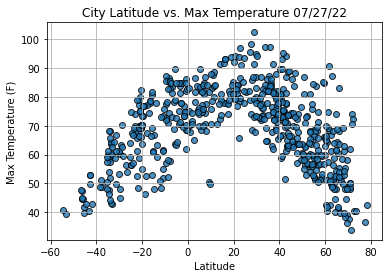

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

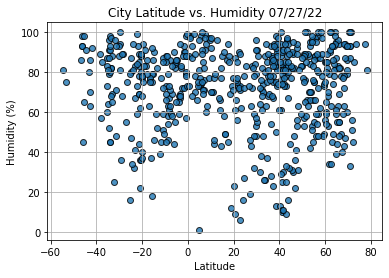

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

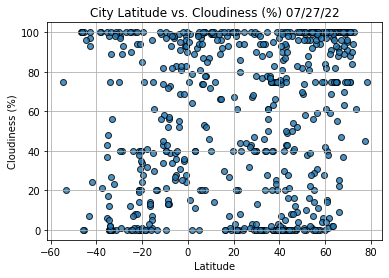

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

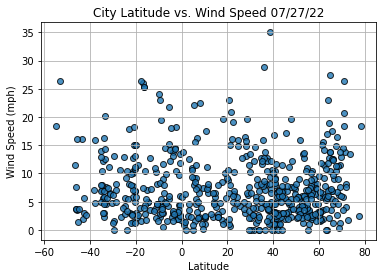

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coos Bay,US,2022-07-28 03:45:11,43.3665,-124.2179,63.00,96,100,6.91
3,Curillo,CO,2022-07-28 03:47:53,1.0333,-75.9191,67.66,98,99,1.23
4,Leningradskiy,RU,2022-07-28 03:47:54,69.3833,178.4167,39.06,79,95,7.56
5,Chalus,IR,2022-07-28 03:47:54,36.6550,51.4204,76.46,88,75,4.61
6,Muros,ES,2022-07-28 03:47:55,42.7762,-9.0603,61.09,83,93,1.01
...,...,...,...,...,...,...,...,...,...
577,Porto Novo,BJ,2022-07-28 04:03:44,6.4965,2.6036,75.65,85,100,11.41
582,Ordu,TR,2022-07-28 04:03:46,40.9086,37.6845,59.50,74,0,3.04
583,Kupino,RU,2022-07-28 04:03:46,54.3663,77.2981,77.40,51,92,10.38
584,Shelburne,CA,2022-07-28 04:03:47,44.0787,-80.2041,66.60,89,21,7.70


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coos Bay,US,2022-07-28 03:45:11,43.3665,-124.2179,63.00,96,100,6.91
3,Curillo,CO,2022-07-28 03:47:53,1.0333,-75.9191,67.66,98,99,1.23
4,Leningradskiy,RU,2022-07-28 03:47:54,69.3833,178.4167,39.06,79,95,7.56
5,Chalus,IR,2022-07-28 03:47:54,36.6550,51.4204,76.46,88,75,4.61
6,Muros,ES,2022-07-28 03:47:55,42.7762,-9.0603,61.09,83,93,1.01


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

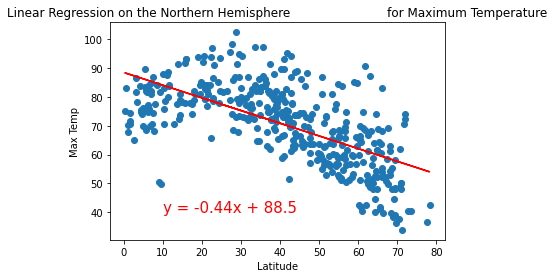

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

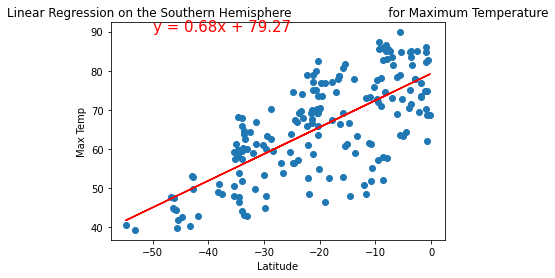

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

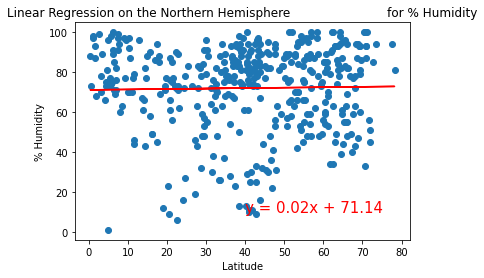

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

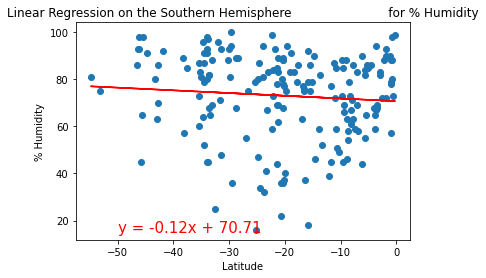

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

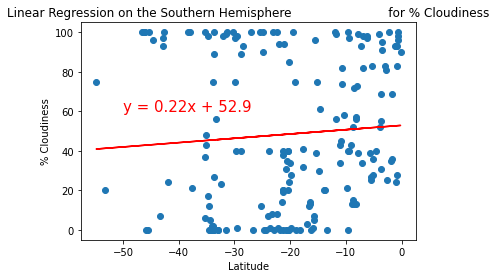

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

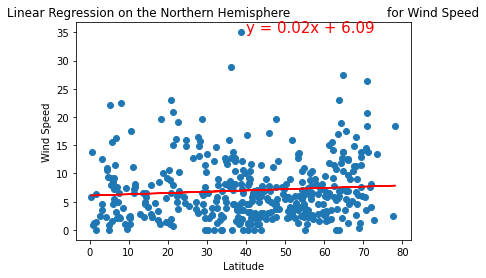

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

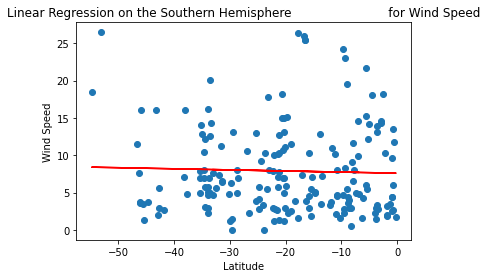

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))